## Pandas for reading data 

In [1]:
import matplotlib
import pandas
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
print (data)  

    Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0            1  Female   133  132  124   118.0    64.5     816932
1            2    Male   140  150  124     NaN    72.5    1001121
2            3    Male   139  123  150   143.0    73.3    1038437
3            4    Male   133  129  128   172.0    68.8     965353
4            5  Female   137  132  134   147.0    65.0     951545
5            6  Female    99   90  110   146.0    69.0     928799
6            7  Female   138  136  131   138.0    64.5     991305
7            8  Female    92   90   98   175.0    66.0     854258
8            9    Male    89   93   84   134.0    66.3     904858
9           10    Male   133  114  147   172.0    68.8     955466
10          11  Female   132  129  124   118.0    64.5     833868
11          12    Male   141  150  128   151.0    70.0    1079549
12          13    Male   135  129  124   155.0    69.0     924059
13          14  Female   140  120  147   155.0    70.5     856472
14        

In [2]:

import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})



,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


## Data manipulation

In [3]:
data.shape
data.columns 
print(data['Gender'])
print (data[data['Gender'] == 'Female']['VIQ'].mean())

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object
109.45


## Groupby

In [4]:
#Splitting based on categorical variables
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

groupby_gender.mean()

('Female', np.float64(109.45))
('Male', np.float64(115.25))


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Plotting pandas data

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

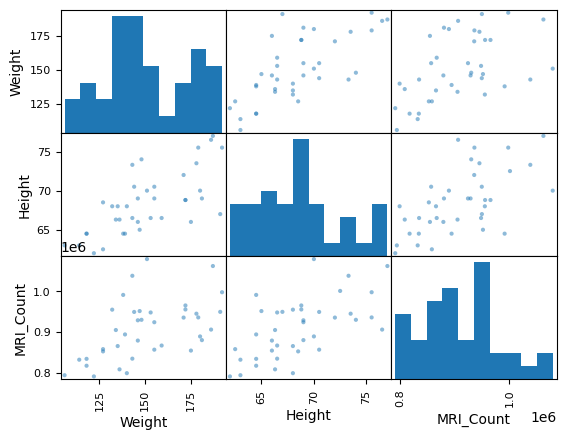

In [5]:
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

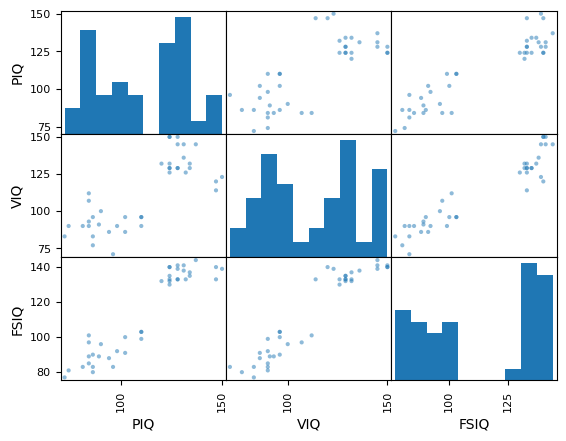

In [6]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])  

## COMPARING TWO GROUPS

In [7]:
from scipy import stats

## 1 SAMPLE T-TEST

In [8]:
stats.ttest_1samp(data['VIQ'], 0)   

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

## 2 SAMPLE T-TEST

In [9]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

## PAIRED TESTS

In [10]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

In [11]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   


TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

In [12]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0) 

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

In [13]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

## LINEAR REGRESSION MODELS

In [14]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
data = pandas.DataFrame({'x': x, 'y': y})

In [15]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           8.56e-08
Time:                        13:56:23   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

##  CATEGORICAL VARIABLES 

In [16]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 10 Jul 2024   Prob (F-statistic):              0.445
Time:                        13:56:26   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

# t-tests between different categories

In [17]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)
stats.ttest_ind(data['FSIQ'], data['PIQ'])

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

## MULTIPLE REGRESSION
#ANOVA testing

In [19]:
data = pandas.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())
print(model.f_test([0, 1, -1, 0]))

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.58e-20
Time:                        13:56:48   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

## SEABORN 

In [3]:
import urllib.request
import os

import matplotlib.pyplot as plt
import pandas

if not os.path.exists('wages.txt'):
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,header=None, engine='python')
data.columns = short_names
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

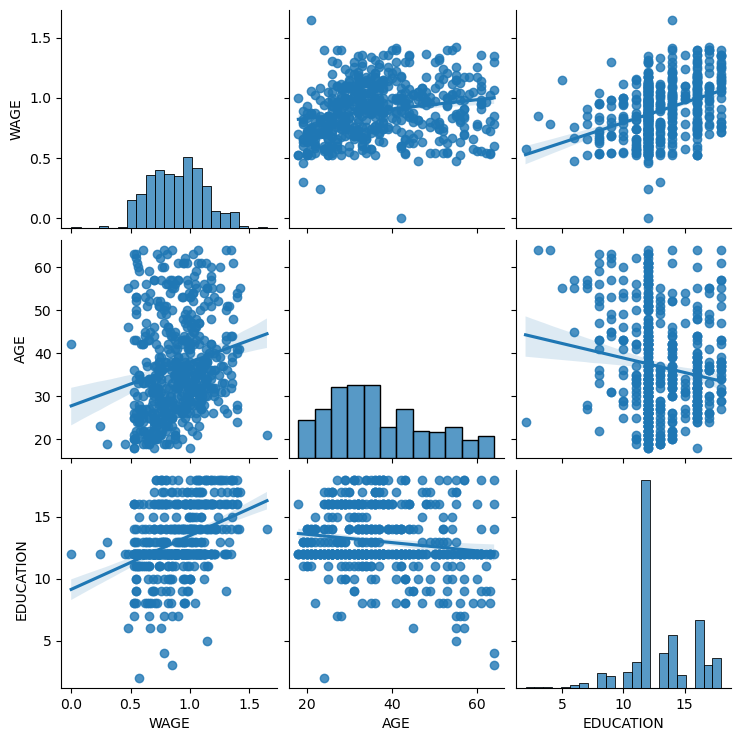

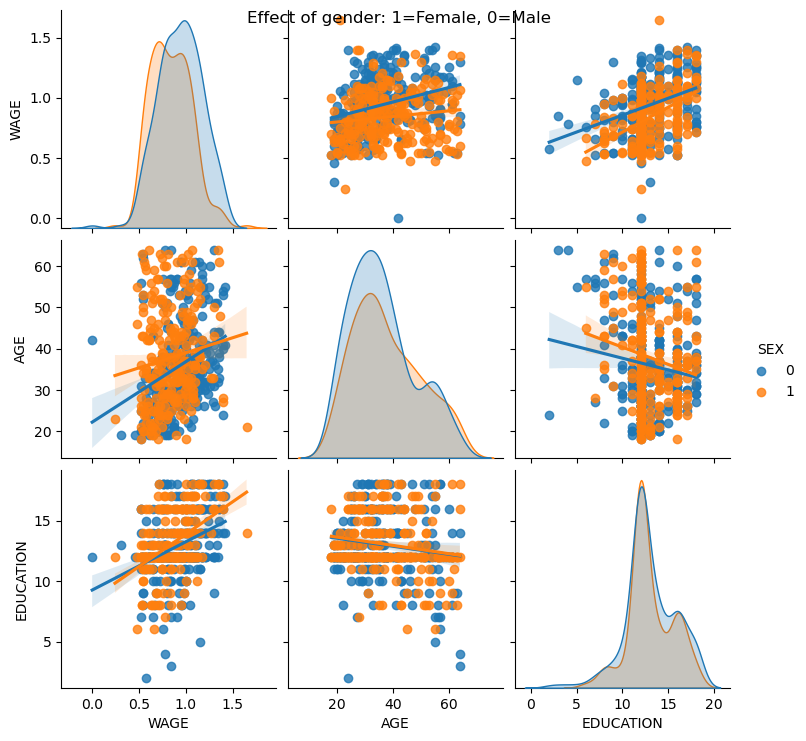

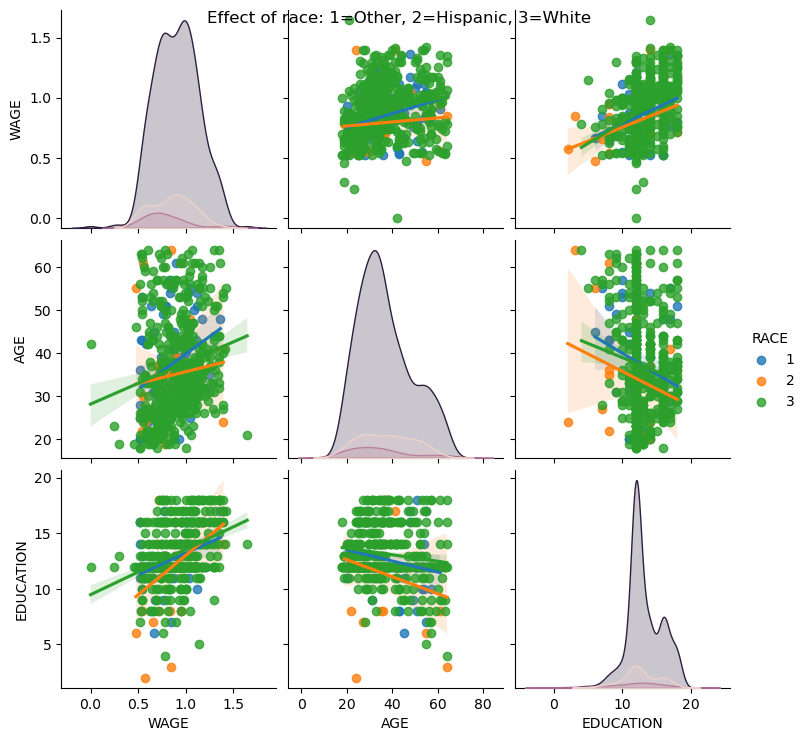

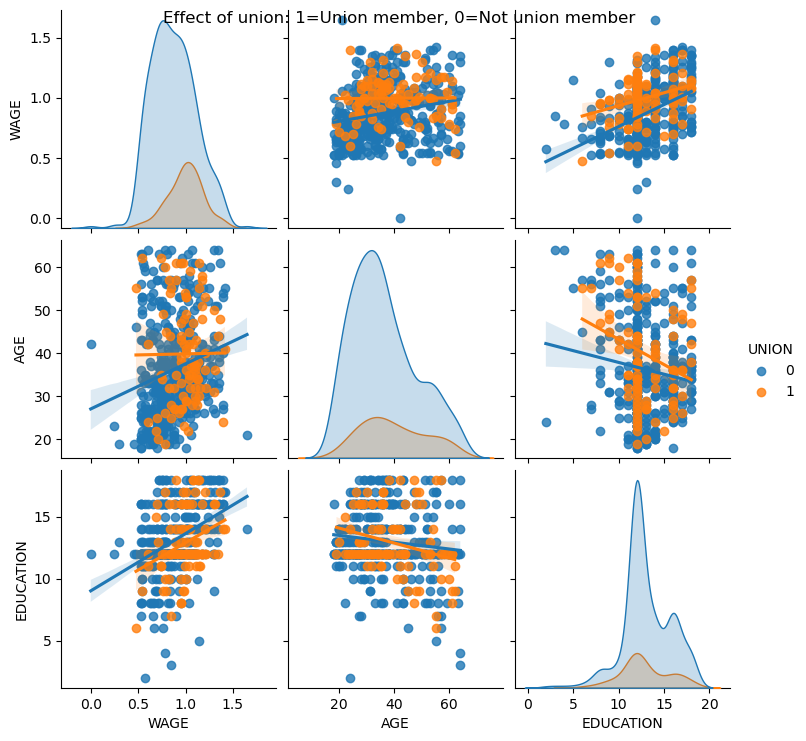

In [72]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

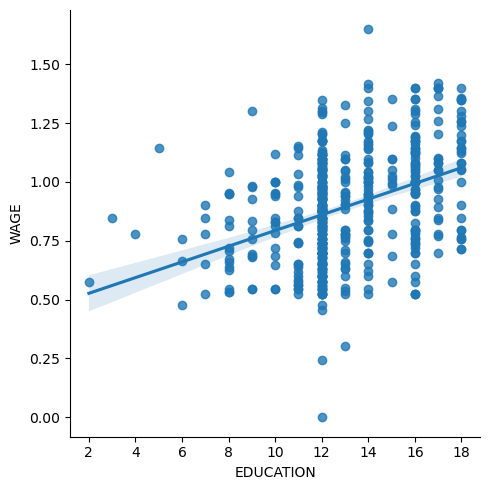

In [4]:
import seaborn
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

plt.show()

## INTERACTIONS

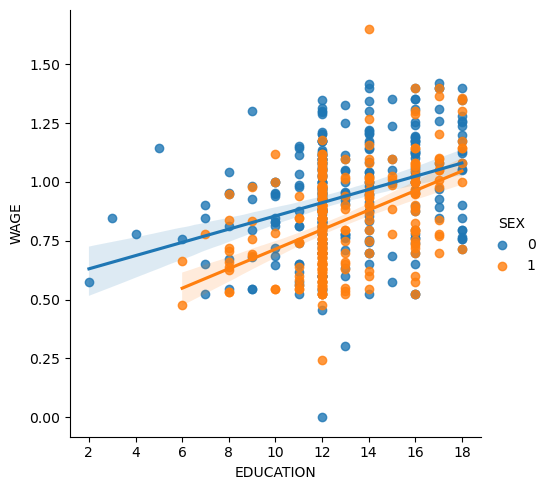

In [5]:

# Plotting with lmplot
seaborn.lmplot(y='WAGE', x='EDUCATION', hue = 'SEX', data=data)


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

result = ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX', data=data).fit()    
#import statsmodels.api as sm
#result = sm.OLS(formula='wage ~ education + gender + education * gender', data=data).fit()
print(result.summary())  

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           2.94e-25
Time:                        15:14:39   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861